<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [3]:
import tensorflow as tf    #Importing necessary libraries
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()   #loading mnist dataset

11490434/11490434 [==============================] - 7s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

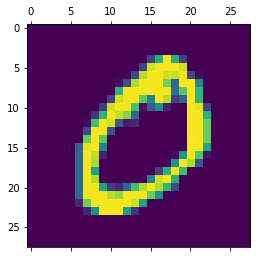

In [5]:
plt.matshow(X_train[1])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [8]:
X_train_flattened.shape

(60000, 784)

In [9]:
X_train_flattened[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.5973 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.9489 - accuracy: 0.8803
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6010 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.5941 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4299 - accuracy: 0.8857


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 921us/step - loss: 5.6241 - accuracy: 0.8918


[5.62410306930542, 0.8917999863624573]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 783us/step


array([4.8016633e-22, 0.0000000e+00, 9.9999845e-01, 1.0000000e+00,
       5.3090084e-11, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

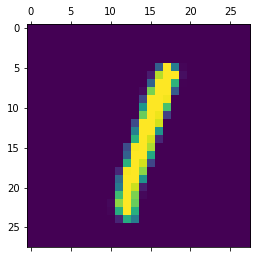

In [13]:
plt.matshow(X_test[5])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [14]:
np.argmax(y_predicted[0])

3

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [51]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    3,    1,    1,    0,    0,    1,    0],
       [   1, 1132,    2,    0,    0,    0,    0,    0,    0,    0],
       [ 165,  365,  497,    2,    2,    0,    1,    0,    0,    0],
       [ 115,  172,  594,  129,    0,    0,    0,    0,    0,    0],
       [  43,   68,  232,  120,  517,    1,    0,    0,    1,    0],
       [ 293,   50,  232,  178,   64,   74,    0,    0,    1,    0],
       [ 209,   53,  692,    2,    2,    0,    0,    0,    0,    0],
       [  73,  112,  392,  398,   39,   11,    0,    3,    0,    0],
       [  82,  307,  520,   17,   23,   23,    1,    0,    1,    0],
       [  30,   71,  178,  471,  245,    1,    0,    7,    0,    6]])>

Text(69.0, 0.5, 'Truth')

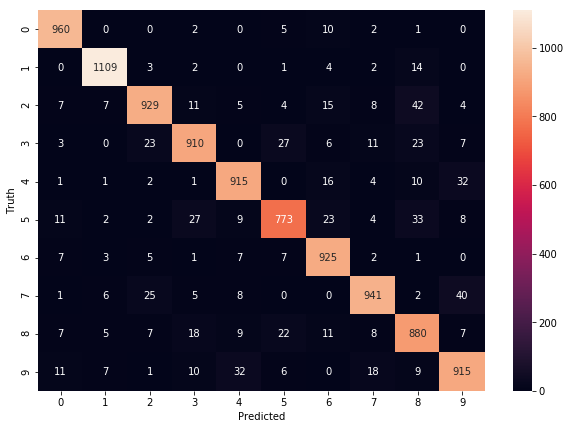

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.6232 - accuracy: 0.8421
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4049 - accuracy: 0.9024
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3026 - accuracy: 0.9256
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2566 - accuracy: 0.9342
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2418 - accuracy: 0.9405


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.9328


[0.2920265793800354, 0.9327999949455261]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 0s 1ms/step


NameError: name 'sn' is not defined

<Figure size 720x504 with 0 Axes>

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.8852 - accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4524 - accuracy: 0.8935
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3205 - accuracy: 0.9184
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2765 - accuracy: 0.9288
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2440 - accuracy: 0.9346
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2265 - accuracy: 0.9397
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2173 - accuracy: 0.9439
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2041 - accuracy: 0.9476
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2019 - accuracy: 0.9488
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.191

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.9337


[0.3180590271949768, 0.9337000250816345]